# آمار توصیفی

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import numpy as np

## سوال 1
توزیع اطلاعات خانوار (میزان تحصیلات، سن، بستگی با سرپرست، وضع فعاليت) را رسم نمایید

In [26]:
file_name = 'U1401_cleaned.xlsx'
df = pd.read_excel(file_name, sheet_name='U1401P1')

In [10]:
df.columns

Index(['Unnamed: 0', 'Address', 'member', 'age', 'relation_encoded',
       'gender_encoded', 'literacy_encoded', 'studying_encoded',
       'degree_encoded', 'occupationalst_encoded', 'maritalst_encoded'],
      dtype='object')

In [12]:
df['relation_encoded']

0        1
1        2
2        3
3        1
4        2
        ..
64730    3
64731    3
64732    3
64733    3
64734    1
Name: relation_encoded, Length: 64735, dtype: int64

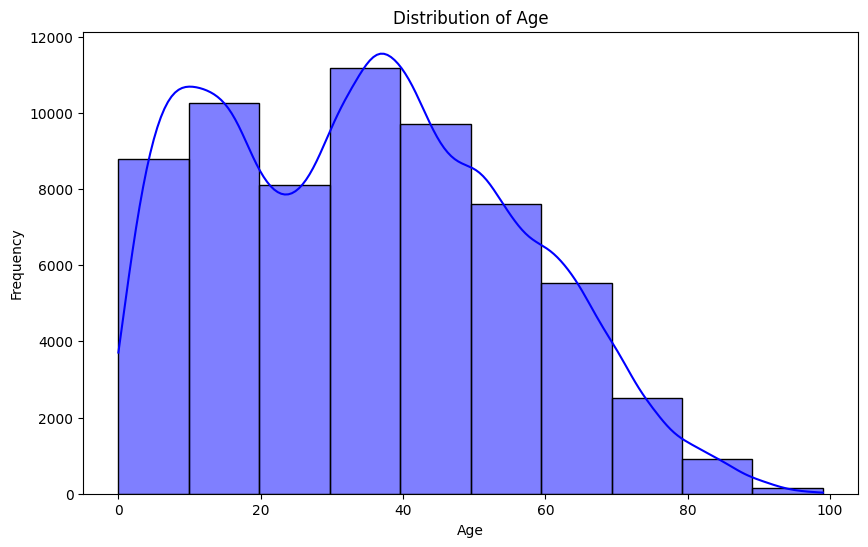

In [28]:
# رسم توزیع سن افراد
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Markazi\AppData\Local\Temp\ipykernel_23692\3426064881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='degree_encoded', palette='Set2')


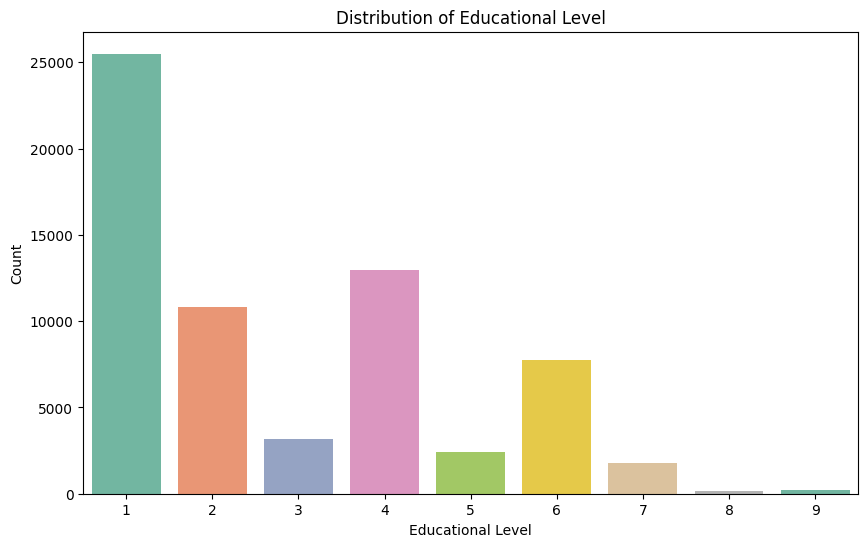

In [29]:
# رسم توزیع میزان تحصیلات
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='degree_encoded', palette='Set2')
plt.title('Distribution of Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.show()

C:\Users\Markazi\AppData\Local\Temp\ipykernel_23692\751974425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='relation_encoded', palette='Set3')


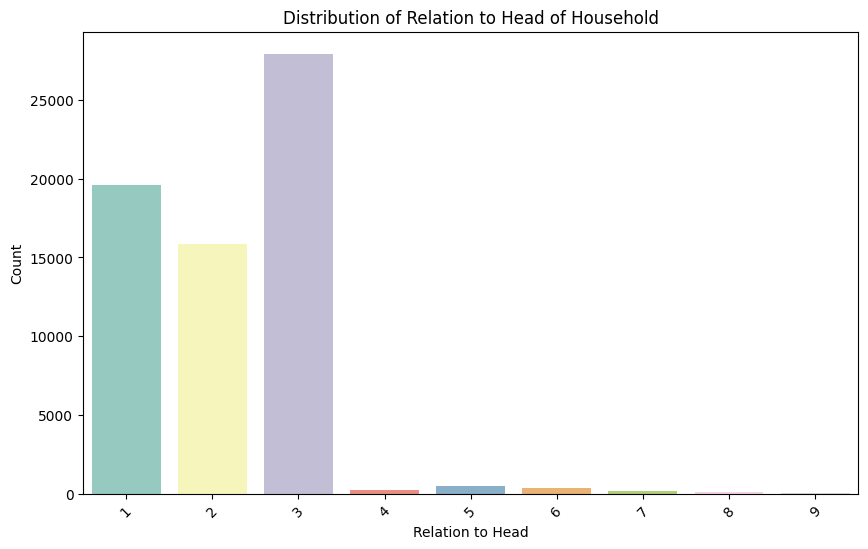

In [30]:
# رسم توزیع بستگی با سرپرست 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='relation_encoded', palette='Set3')
plt.title('Distribution of Relation to Head of Household')
plt.xlabel('Relation to Head')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Markazi\AppData\Local\Temp\ipykernel_23692\3333926379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='occupationalst_encoded', palette='Set1')


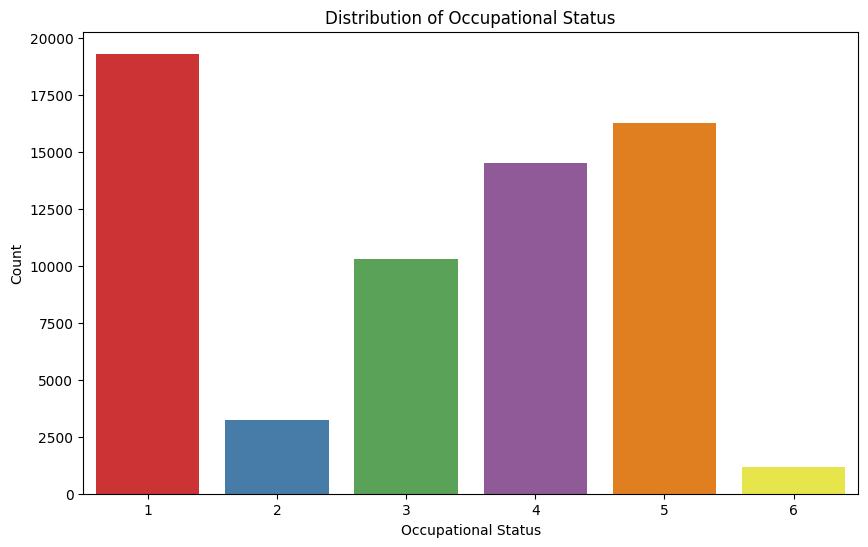

In [31]:
# رسم توزیع وضعیت فعالیت 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='occupationalst_encoded', palette='Set1')
plt.title('Distribution of Occupational Status')
plt.xlabel('Occupational Status')
plt.ylabel('Count')
plt.show()

## سوال 2
توزیع استفاده‌ی خانوارها از وسایل نقلیه (ماشین، موتور، دوچرخه و …) به تفکیک سال

In [6]:
file_U1401 = 'U1401_cleaned.xlsx'
file_U1400 = 'U1400_cleaned.xlsx'
file_U99 = 'U99_cleaned.xlsx'
file_U98 = 'U98_cleaned.xlsx'
file_R1401 = 'R1401_cleaned.xlsx'
file_R1400 = 'R1400_cleaned.xlsx'
file_R99 = 'R99_cleaned.xlsx'
file_R98 = 'R98_cleaned.xlsx'
df_U1401 = pd.read_excel(file_U1401, sheet_name='U1401P2')
df_U1400 = pd.read_excel(file_U1400, sheet_name='U1400P2')
df_U99 = pd.read_excel(file_U99, sheet_name='U99P2')
df_U98 = pd.read_excel(file_U98, sheet_name='U98P2')
df_R1401 = pd.read_excel(file_R1401, sheet_name='R1401P2')
df_R1400 = pd.read_excel(file_R1400, sheet_name='R1400P2')
df_R99 = pd.read_excel(file_R99, sheet_name='R99P2')
df_R98 = pd.read_excel(file_R98, sheet_name='R98P2')
df_1401 = pd.concat([df_R1401, df_U1401], ignore_index=True)
df_1400 = pd.concat([df_R1400, df_U1400], ignore_index=True)
df_99 = pd.concat([df_R99, df_U99], ignore_index=True)
df_98 = pd.concat([df_R98, df_U98], ignore_index=True)
df_1401['Year'] = 1401
df_1400['Year'] = 1400
df_99['Year'] = 99
df_98['Year'] = 98
df = pd.concat([df_1401, df_1400, df_99, df_98], ignore_index=True)

ValueError: Worksheet named 'U98P2' not found

In [ ]:
vehicles = ['vehicle', 'motorcycle', 'bicycle']
df[vehicles] = df[vehicles].astype(int)
df[vehicles]

In [ ]:
vehicle_usage = df.groupby('Year')[vehicles].mean() * 100
vehicle_usage.plot(kind='bar', figsize=(10, 6))
plt.title('Vehicle Usage by Household (Car, Motorcycle, Bicycle) by Year')
plt.xlabel('Year')
plt.ylabel('Usage Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Vehicle Type')
plt.show()

## سوال 3
توزیع حقوق بازنشستگان و هزینه اجاره املاک (مسکن، باغ و …) به تفکیک سال در یک نمودار تجمیعی

In [18]:
file_1401 = 'U1401_cleaned.xlsx'
file_1400 = 'U1400_cleaned.xlsx'

df_1401 = pd.read_excel(file_1401, sheet_name='U1401P4S03')
df_1400 = pd.read_excel(file_1400, sheet_name='U1400P4S03')
df_1401['Year'] = 1401
df_1400['Year'] = 1400
df = pd.concat([df_1401, df_1400], ignore_index=True)

In [19]:
df_requierd = df[['income_pension', 'income_rent', 'year']]
print(df_requierd.dtypes)
df_requierd.loc[:, 'income_pension'] = pd.to_numeric(df_requierd['income_pension'], errors='coerce')
df_requierd

income_pension    float64
income_rent       float64
year                int64
dtype: object


,income_pension,income_rent,year
0,0.0,0.0,1401
1,432000000.0,0.0,1401
2,960000000.0,0.0,1401
3,0.0,0.0,1401
4,0.0,0.0,1401
...,...,...,...
51122,NaN,NaN,1401
51123,NaN,NaN,1401
51124,0.0,0.0,1401
51125,0.0,0.0,1401


In [ ]:
df_requierd = df_requierd.dropna()
grouped_df = df_requierd.groupby('year').mean()

In [ ]:
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', stacked=True)
plt.title('Distribution of Pension and Rent Income by Year')
plt.xlabel('Year')
plt.ylabel('Average Income (Currency Unit)')
plt.xticks(rotation=0)
plt.legend(title='Income Type')
plt.show()

## سوال 4
ترند هزینه خانوار برای در هر سال برای غذاهای آماده، هتل و رستوران رسم نمایید

In [ ]:
data99 = pd.read_excel('R99_cleaned.xlsx', sheet_name=None)
data98 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name=None)
data1400 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name=None)
data1401 = pd.read_excel('R1401_cleaned.xlsx', sheet_name=None)
dataU98 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name=None)
dataU99 = pd.read_excel('U99_cleaned.xlsx', sheet_name=None)
dataU1400 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name=None)
dataU1401 = pd.read_excel('U1401_cleaned.xlsx', sheet_name=None)

In [ ]:
R99Data = pd.read_excel('R99_cleaned.xlsx', sheet_name='R99Data')
R99P1 = pd.read_excel('R99_cleaned.xlsx', sheet_name='R99P1')
R99P2 = pd.read_excel('R99_cleaned.xlsx', sheet_name='R99P2')
R99P3S01 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Food')
R99P3S02 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Tobacco')
R99P3S03 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Clothing')
R99P3S04 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Housing')
R99P3S05 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Furniture')
R99P3S06 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Health')
R99P3S07 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Transport')
R99P3S08 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Communication')
R99P3S09 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Recreation')
R99P3S11 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Education')
R99P3S12 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Hotel')
R99P3S13 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Miscellaneous')
R99P3S14 = pd.read_excel('R99_cleaned.xlsx', sheet_name='Investment')
R99P4S1 = pd.read_excel('R99_cleaned.xlsx', sheet_name='R99P4S01')
R99P4S2 = pd.read_excel('R99_cleaned.xlsx', sheet_name='R99P4S02')
R99P4S3 = pd.read_excel('R99_cleaned.xlsx', sheet_name='R99P4S03')
R99P4S4 = pd.read_excel('R99_cleaned.xlsx', sheet_name='R99P4S04')
R98Data = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='R98Data')
R98P1 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='R98P1')
R98P2 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='R98P2')
R98P3S01 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Food')
R98P3S02 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Tobacco')
R98P3S03 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Clothing')
R98P3S04 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Housing')
R98P3S05 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Furniture')
R98P3S06 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Health')
R98P3S07 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Transport')
R98P3S08 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Communication')
R98P3S09 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Recreation')
R98P3S11 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Education')
R98P3S12 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Hotel')
R98P3S13 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Miscellaneous')
R98P3S14 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='Investment')
R98P4S1 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='R98P4S01')
R98P4S2 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='R98P4S02')
R98P4S3 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='R98P4S03')
R98P4S4 = pd.read_excel('cleaned_data_final_R1398.xlsx', sheet_name='R98P4S04')
R1400Data = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='R1400Data')
R1400P3S11 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='Education')
R1400P3S03 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='Clothing')
R1400P3S01 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='Food')
R1400P3S04 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='Housing')
R1400P3S06 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='Health')
R1400P4S1 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='R1400P4S01')
R1400P4S2 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='R1400P4S02')
R1400P4S3 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='R1400P4S03')
R1400P4S4 = pd.read_excel('cleaned_data_final_R1400.xlsx', sheet_name='R1400P4S04')
R1401Data = pd.read_excel('R1401_cleaned.xlsx', sheet_name='R1401Data')
R1401P3S11 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='Education')
R1401P3S03 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='Clothing')
R1401P3S01 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='Food')
R1401P3S04 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='Housing')
R1401P3S06 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='Health')
R1401P4S1 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='R1401P4S01')
R1401P4S2 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='R1401P4S02')
R1401P4S3 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='R1401P4S03')
R1401P4S4 = pd.read_excel('R1401_cleaned.xlsx', sheet_name='R1401P4S04')
U98Data = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='U98Data')
U98P3S11 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='Education')
U98P3S01 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='Food')
U98P3S03 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='Clothing')
U98P3S04 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='Housing')
U98P3S06 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='Health')
U98P4S01 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='U98P4S01')
U98P4S02 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='U98P4S02')
U98P4S03 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='U98P4S03')
U98P4S04 = pd.read_excel('cleaned_data_final_u98.xlsx', sheet_name='U98P4S04')
U99Data = pd.read_excel('U99_cleaned.xlsx', sheet_name='U99Data')
U99P3S11 = pd.read_excel('U99_cleaned.xlsx', sheet_name='Education')
U99P3S01 = pd.read_excel('U99_cleaned.xlsx', sheet_name='Food')
U99P3S03 = pd.read_excel('U99_cleaned.xlsx', sheet_name='Clothing')
U99P3S04 = pd.read_excel('U99_cleaned.xlsx', sheet_name='Housing')
U99P3S06 = pd.read_excel('U99_cleaned.xlsx', sheet_name='Health')
U99P4S1 = pd.read_excel('U99_cleaned.xlsx', sheet_name='U99P4S01')
U99P4S2 = pd.read_excel('U99_cleaned.xlsx', sheet_name='U99P4S02')
U99P4S3 = pd.read_excel('U99_cleaned.xlsx', sheet_name='U99P4S03')
U99P4S4 = pd.read_excel('U99_cleaned.xlsx', sheet_name='U99P4S04')

In [ ]:
U1400Data = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='U1400Data')
U1400P3S01 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='Food')
U1400P3S03 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='Clothing')
U1400P3S04 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='Housing')
U1400P3S06 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='Health')
U1400P4S1 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='U1400P4S01')
U1400P4S2 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='U1400P4S02')
U1400P4S3 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='U1400P4S03')
U1400P4S4 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='U1400P4S04')
U1400P3S11 = pd.read_excel('cleaned_data_final_U1400.xlsx', sheet_name='Education')

In [ ]:
U1401Data = pd.read_excel('U1401_cleaned.xlsx', sheet_name='U1401Data')
U1401P3S01 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='Food')
U1401P3S03 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='Clothing')
U1401P3S04 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='Housing')
U1401P3S06 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='Health')
U1401P4S1 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='U1401P4S01')
U1401P4S2 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='U1401P4S02')
U1401P4S3 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='U1401P4S03')
U1401P4S4 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='U1401P4S04')
U1401P3S11 = pd.read_excel('U1401_cleaned.xlsx', sheet_name='Education')

In [ ]:
for sheet_name, df in data99.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    data99[sheet_name] = df

In [ ]:
for sheet_name, df in data98.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    data98[sheet_name] = df

In [ ]:
for sheet_name, df in data1400.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    data1400[sheet_name] = df


In [ ]:
for sheet_name, df in data1401.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    data1401[sheet_name] = df

In [ ]:
for sheet_name, df in dataU98.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    dataU98[sheet_name] = df

In [ ]:
for sheet_name, df in dataU99.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    dataU99[sheet_name] = df

In [ ]:
for sheet_name, df in dataU1400.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    dataU1400[sheet_name] = df

In [ ]:
for sheet_name, df in dataU1401.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    dataU1401[sheet_name] = df

In [ ]:
meanValue98 = R98P3S11['value'].mean()
meanValue99 = R99P3S11['value'].mean()
meanValue1400 = R1400P3S11['value'].mean()
meanValue1401 = R1401P3S11['value'].mean()
meanValueU98 = U98P3S11['value'].mean()
meanValueU99 = U99P3S11['value'].mean()
meanValueU1400 = U1400P3S11['value'].mean()
meanValueU1401 = U1401P3S11['value'].mean()
MeanArray = [meanValue98, meanValue99, meanValue1400, meanValue1401]
MeanArrayU = [meanValueU98, meanValueU99, meanValueU1400, meanValueU1401]
Years = [1398, 1399, 1400, 1401]
plt.plot(Years, MeanArray, color='b')
plt.xticks(Years)
plt.xlabel('Years')
plt.ylabel('Expenditure on restaurant, hotel, and ready-to-cook food in rural areas')
plt.title('The trend of expenditure over years in rural areas')
plt.show()
plt.plot(Years, MeanArrayU, color='r')
plt.xticks(Years)
plt.xlabel('Years')
plt.ylabel('Expenditure on restaurant, hotel, and ready-to-cook food in urban areas')
plt.title('The trend of expenditure over years in urabn areas ')

## سوال 5
 ماتریس هم‌بستگی را برای هزینه‌های پوشاک و كفش خانوار، هزينه‌هاي خوراكي خانوار، هزينه‌های مسكن، آب، فاضلاب، سوخت و روشنايي خانوار و هزينه‌هاي بهداشتي و درماني خانوار رسم نمایید

In [ ]:
ClothEx98 = R98P3S03['value']
ClothEx99 = R99P3S03['value']
ClothEx1400 = R1400P3S03['value']
ClothEx1401 = R1401P3S03['value']
FoodEx98 = R98P3S01['value']
FoodEx99 = R99P3S01['value']
FoodEx1400 = R1400P3S01['value']
FoodEx1401 = R1401P3S01['value']
HousingEx98 = R98P3S04['value']
HousingEx99 = R99P3S04['value']
HousingEx1400 = R1400P3S04['value']
HousingEx1401 = R1401P3S04['value']
HealthEx98 = R98P3S06['value']
HealthEx99 = R99P3S06['value']
HealthEx1400 = R1400P3S06['value']
HealthEx1401 = R1401P3S06['value']

In [ ]:
ClothExU98 = U98P3S03['value']
ClothExU99 = U99P3S03['value']
ClothExU1400 = U1400P3S03['value']
ClothExU1401 = U1401P3S03['value']
FoodExU98 = U98P3S01['value']
FoodExU99 = U99P3S01['value']
FoodExU1400 = U1400P3S01['value']
FoodExU1401 = U1401P3S01['value']
HousExU98 = U98P3S04['value']
HousExU99 = U99P3S04['value']
HousExU1400 = U1400P3S04['value']
HousExU1401 = U1401P3S04['value']
HealthExU98 = U98P3S06['value']
HealthExU99 = U99P3S06['value']
HealthExU1400 = U1400P3S06['value']
HealthExU1401 = U1401P3S06['value']

In [ ]:
Merged98 = pd.concat([ClothEx98, FoodEx98, HousingEx98, HealthEx98], axis=1)
Merged99 = pd.concat([ClothEx99, FoodEx99, HousingEx99, HealthEx99], axis=1)
Merged1400 = pd.concat([ClothEx1400, FoodEx1400, HousingEx1400, HealthEx1400], axis=1)
Merged1401 = pd.concat([ClothEx1401, FoodEx1401, HousingEx1401, HealthEx1401], axis=1)

In [ ]:
Mean98 = Merged98.mean(axis=1)
Mean99 = Merged99.mean(axis=1)
Mean400 = Merged1400.mean(axis=1)
Mean401 = Merged1401.mean(axis=1)
MergedMeanR = pd.concat([Mean98, Mean99, Mean400, Mean401], axis=1)

In [ ]:
MergedU98 = pd.concat([ClothExU98, FoodExU98, HousExU98, HealthExU98], axis=1)
MergedU99 = pd.concat([ClothExU99, FoodExU99, HousExU99, HealthExU99], axis=1)
MergedU1400 = pd.concat([ClothExU1400, FoodExU1400, HousExU1400, HealthExU1400], axis=1)
MergedU1401 = pd.concat([ClothExU1401, FoodExU1401, HousExU1401, HealthExU1401], axis=1)

In [ ]:
MeanU98 = MergedU98.mean(axis=1)
MeanU99 = MergedU99.mean(axis=1)
MeanU400 = MergedU1400.mean(axis=1)
MeanU1401 = MergedU1401.mean(axis=1)
MergedMeanU = pd.concat([MeanU98, MeanU99, MeanU400, MeanU1401], axis=1)

In [ ]:
corrMeanU = MergedMeanU.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrMeanU, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix among data in different years in urban areas')
plt.show()

In [ ]:
corrMeanR = MergedMeanR.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrMeanR, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix among data in different years in rural areas')
plt.show()

In [ ]:
cor98 = Merged98.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor98, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Data in 98 in Rural Areas')
plt.show()

In [ ]:
corr99 = Merged99.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr99, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Expenditure in 99 in Rural Areas')

In [ ]:
corr1400 = Merged1400.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr1400, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Expenditure in 1400 in Rural Areas')
plt.show()

In [ ]:
corr1401 = Merged1401.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr1401, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Expenditure in 1401 in Rural Areas')
plt.show()

In [ ]:
corr98U = MergedU98.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr98U, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Expenditure in 1398 in Urban Areas')
plt.show()

In [ ]:
corr99U = MergedU99.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr99U, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Expenditure in 1399 in Urban Areas')
plt.show()

In [ ]:
corr1400U = MergedU1400.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr1400U, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Expenditure in 1400 in Urban Areas')
plt.show()


In [ ]:
corr1401U = MergedU1401.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr1401U, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Expenditure in 1401 in Urban Areas')
plt.show()

## سوال 6
تعاریف زیر را در نظر بگیرید:
درآمد حقیقی: میزان درآمد با در نظر گرفتن تورم و تنزیل کردن آن
درآمد اسمی: میزان درآمد بدون در نظر گرفتن تورم
با توجه به تعاریف بالا، روند میزان درآمد اسمی و درآمد حقیقی را در یک صفحه رسم نمایید

# آزمون فرض

## به نظر شما درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری با هم برابر است؟

In [ ]:
MergedDataFrames98R = R98Data.merge(R98P4S1, on='Address').merge(R98P4S2, on='Address').merge(R98P4S3,
                                                                                              on='Address').merge(
    R98P4S4, on='Address')
InChar98R = MergedDataFrames98R[MergedDataFrames98R['province_encoded'] == 14][
    ['income_w_m', 'income_w_y', 'wage_w_m', 'wage_w_y', 'perk_w_m', 'perk_w_y', 'netincome_w_m', 'netincome_w_y',
     'income_s_y', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer',
     'subsidy']]
MergedDataFrames99R = R99Data.merge(R99P4S1, on='Address').merge(R99P4S2, on='Address').merge(R99P4S3,
                                                                                              on='Address').merge(
    R99P4S4, on='Address')
InChar99R = MergedDataFrames99R[MergedDataFrames99R['province_encoded'] == 14][
    ['income_w_m', 'income_w_y', 'wage_w_m', 'wage_w_y', 'perk_w_m', 'perk_w_y', 'netincome_w_m', 'netincome_w_y',
     'income_s_y', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer',
     'subsidy']]
MergedDataFrames400R = R1400Data.merge(R400P4S1, on='Address').merge(R400P4S2, on='Address').merge(R400P4S3,
                                                                                                   on='Address').merge(
    R400P4S4, on='Address')
InChar400R = MergedDataFrames400R[MergedDataFrames400R['province_encoded'] == 14][
    ['income_w_m', 'income_w_y', 'wage_w_m', 'wage_w_y', 'perk_w_m', 'perk_w_y', 'netincome_w_m', 'netincome_w_y',
     'income_s_y', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer',
     'subsidy']]
MergedDataFrames401R = R1401Data.merge(R1401P4S1, on='Address').merge(R1401P4S2, on='Address').merge(R1401P4S3,
                                                                                                     on='Address').merge(
    R1401P4S4, on='Address')
InChar401R = MergedDataFrames401R[MergedDataFrames401R['province_encoded'] == 14][
    ['income_w_m', 'income_w_y', 'wage_w_m', 'wage_w_y', 'perk_w_m', 'perk_w_y', 'netincome_w_m', 'netincome_w_y',
     'income_s_y', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer',
     'subsidy']]
IncomeDataframesR = [InChar98R, InChar99R, InChar400R, InChar401R]
for i, df in enumerate(IncomeDataframesR):
    df[f'Sum_{i + 1}'] = df.sum(axis=1)

In [ ]:
MergedDataFrames98U = U98Data.merge(U98P4S1, on='Address').merge(U98P4S2, on='Address').merge(U98P4S3,
                                                                                              on='Address').merge(
    U98P4S4, on='Address')
InChar98U = MergedDataFrames98U[MergedDataFrames98U['province_encoded'] == 14][
    ['income_w_m', 'income_w_y', 'wage_w_m', 'wage_w_y', 'perk_w_m', 'perk_w_y', 'netincome_w_m', 'netincome_w_y',
     'income_s_y', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer',
     'subsidy']]
MergedDataFrames99U = U99Data.merge(U99P4S1, on='Address').merge(U99P4S2, on='Address').merge(U99P4S3,
                                                                                              on='Address').merge(
    U99P4S2, on='Address')
InChar99U = MergedDataFrames99U[MergedDataFrames99U['province_encoded'] == 14][
    ['income_w_m', 'income_w_y', 'wage_w_m', 'wage_w_y', 'perk_w_m', 'perk_w_y', 'netincome_w_m', 'netincome_w_y',
     'income_s_y', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer',
     'subsidy']]
MergedDataFrames400U = U400Data.merge(U400P4S1, on='Address').merge(U400P4S2, on='Address').merge(U400P4S3,
                                                                                                  on='Address').merge(
    U400P4S4, on='Address')
InChar400U = MergedDataFrames400U[MergedDataFrames400U['province_encoded'] == 14][
    ['income_w_m', 'income_w_y', 'wage_w_m', 'wage_w_y', 'perk_w_m', 'perk_w_y', 'netincome_w_m', 'netincome_w_y',
     'income_s_y', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer',
     'subsidy']]
MergedDataFrames401U = U401Data.merge(U401P4S1, on='Address').merge(U401P4S2, on='Address').merge(U401P4S3,
                                                                                                  on='Address').merge(
    U401P4S4, on='Address')
InChar401U = MergedDataFrames401U[MergedDataFrames401U['province_encoded'] == 14][
    ['income_w_m', 'income_w_y', 'wage_w_m', 'wage_w_y', 'perk_w_m', 'perk_w_y', 'netincome_w_m', 'netincome_w_y',
     'income_s_y', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer',
     'subsidy']]
IncomeDataframesU = [InChar98U, InChar99U, InChar400U, InChar401U]
for i, df in enumerate(IncomeDataframesU):
    df[f'Sum_{i + 1}'] = df.sum(axis=1)

In [ ]:
for idx, (df1, df2) in enumerate(zip(IncomeDataframesR, IncomeDataframesU)):
    stat1, p1 = shapiro(df1['sale'])
    normal1 = p1 > 0.5
    stat2, p2 = shapiro(df2['sale'])
    normal2 = p2 > 0.5
    if normal1 and normal2:
        t_stat, p_val = ttest_ind(df1['sale'], df2['sale'])
        if p_val < 0.05:
            print(f"Set {idx + 1}: Reject the null hypothesis - Significant difference in sales between sets.")
            print(f"Hypothesis testing performed on 'sale' columns.")
        else:
            print(
                f"Set {idx + 1}: Fail to reject the null hypothesis - No significant difference in sales between sets.")
            print(f"No significant difference found in 'sale' columns.")
    else:
        print(
            f"Set {idx + 1}: Perform non-parametric test or data transformation as sales data is not normally distributed.")

## آیا به طور میانگین تفاوت مشهودی میان ارزش خانه‌های شهری و روستایی مشاهده میکنید؟

In [ ]:
U_file_name = 'U1401_cleaned.xlsx'
R_file_name = 'R1401_cleaned.xlsx'
U_df = pd.read_excel(U_file_name, sheet_name='U1401P3S04')
R_df = pd.read_excel(R_file_name, sheet_name='R1401P3S04')
U_df, R_df

In [ ]:
urban_house_value = U_df['value']
rural_house_value = R_df['value']
urban_house_value, rural_house_value

In [ ]:
# بررسی واریانس و میانگین داده ها
print(urban_house_value.var(), rural_house_value.var())
print(urban_house_value.mean(), rural_house_value.mean())

In [ ]:
# بررسی نرمال بودن داده های ارزش خانه های روستایی با استفاده از آزمون شاپیرو-ویلک
stat, p_value = stats.shapiro(urban_house_value)

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("داده‌ها از توزیع نرمال پیروی می‌کنند (فرض صفر رد نمی‌شود)")
else:
    print("داده‌ها از توزیع نرمال پیروی نمی‌کنند (فرض صفر رد می‌شود)")

In [ ]:
# بررسی نرمال بودن داده های ارزش خانه های شهری با استفاده از آزمون شاپیرو-ویلک
stat, p_value = stats.shapiro(rural_house_value)

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("داده‌ها از توزیع نرمال پیروی می‌کنند (فرض صفر رد نمی‌شود)")
else:
    print("داده‌ها از توزیع نرمال پیروی نمی‌کنند (فرض صفر رد می‌شود)")

In [ ]:
# نرمال سازی داده ها با استفاده از روش Box-Cox
U_boxcox_data, U_fitted_lambda = stats.boxcox(urban_house_value)
R_boxcox_data, R_fitted_lambda = stats.boxcox(rural_house_value)
import numpy as np

# نرمال سازی داده ها با استفاده از روش تبدیلات لگاریتمی و تبدیلات معکوس
U_reciprocal_data = 1 / np.array(urban_house_value)
U_log_data = np.log(urban_house_value)
R_reciprocal_data = 1 / np.array(rural_house_value)
R_log_data = np.log(rural_house_value)

In [ ]:
# اجرای آزمون شاپیرو-ویلک بر روی داده های نرمال شده خانه های روستایی
stat_box, p_value_box = stats.shapiro(U_boxcox_data)
stat_rec, p_value_rec = stats.shapiro(U_reciprocal_data)
stat_log, p_value_log = stats.shapiro(U_log_data)
print(f"Shapiro-Wilk Test Statistic for box-cox method: {stat_box}")
print(f"Shapiro-Wilk Test Statistic for reciproca method: {stat_rec}")
print(f"Shapiro-Wilk Test Statistic for log method: {stat_log}")
print(f"P-value box-cox method: {p_value_box}")
print(f"P-value for reciproca method: {p_value_rec}")
print(f"P-value for log method: {p_value_log}")

p_value_max = max(p_value_box, p_value_rec, p_value_log)
alpha = 0.05
if p_value_max > alpha:
    print("داده‌ها از توزیع نرمال پیروی می‌کنند (فرض صفر رد نمی‌شود)")
else:
    print("داده‌ها از توزیع نرمال پیروی نمی‌کنند (فرض صفر رد می‌شود)")

In [ ]:
# اجرای آزمون شاپیرو-ویلک بر روی داده های نرمال شده خانه های شهری
stat_box, p_value_box = stats.shapiro(R_boxcox_data)
stat_rec, p_value_rec = stats.shapiro(R_reciprocal_data)
stat_log, p_value_log = stats.shapiro(R_log_data)
print(f"Shapiro-Wilk Test Statistic for box-cox method: {stat_box}")
print(f"Shapiro-Wilk Test Statistic for reciproca method: {stat_rec}")
print(f"Shapiro-Wilk Test Statistic for log method: {stat_log}")
print(f"P-value box-cox method: {p_value_box}")
print(f"P-value for reciproca method: {p_value_rec}")
print(f"P-value for log method: {p_value_log}")

p_value_max = max(p_value_box, p_value_rec, p_value_log)
alpha = 0.05
if p_value_max > alpha:
    print("داده‌ها از توزیع نرمال پیروی می‌کنند (فرض صفر رد نمی‌شود)")
else:
    print("داده‌ها از توزیع نرمال پیروی نمی‌کنند (فرض صفر رد می‌شود)")

In [ ]:
# تست mannwhitneyu برای آزمون فرض
u_stat, p_value = stats.mannwhitneyu(urban_house_value, rural_house_value)
print(f'U-statistic: {u_stat}, P-value: {p_value}')

In [ ]:
# تست t برای آزمون فرض
# t_stat, p_value = stats.ttest_ind(urban_house_value, rural_house_value, equal_var=False)

# print(f'T-statistic: {t_stat}, P-value: {p_value}')

## آیا میان مجموع درآمد سالانه افرادی که به دانشگاه رفته‌اند و افرادی که به دانشگاه نرفته‌اند تفاوت معناداری وجود دارد؟

In [20]:
file_name = 'U1401_cleaned.xlsx'
df_education = pd.read_excel(file_name, sheet_name='U1401P1')
df_income1 = pd.read_excel(file_name, sheet_name='U1401P4S01')
df_income2 = pd.read_excel(file_name, sheet_name='U1401P4S02')

In [23]:
df_education.columns

Index(['Unnamed: 0', 'Address', 'member', 'age', 'relation_encoded',
       'gender_encoded', 'literacy_encoded', 'studying_encoded',
       'degree_encoded', 'occupationalst_encoded', 'maritalst_encoded'],
      dtype='object')

In [21]:
# انتخاب ستون‌های مربوط به تحصیلات و درآمد
df_education = df_education[['Address', 'member', 'Degree']]
df_income1 = df_income1[['Address', 'Member', 'income_w_y']]  # درآمد سالانه از مشاغل مزدبگیری
df_income2 = df_income2[['Address', 'Member', 'income_s_y']]  # درآمد سالانه از مشاغل آزاد

# ترکیب دو شیت درآمد
df_income = pd.concat([df_income1.rename(columns={'income_w_y': 'annual_income'}),
                       df_income2.rename(columns={'income_s_y': 'annual_income'})], ignore_index=True)


KeyError: "['Degree'] not in index"

In [ ]:
# ادغام اطلاعات تحصیلات و درآمد
df = pd.merge(df_education, df_income, how='inner', left_on=['Address', 'member'], right_on=['Address', 'Member'])

# برچسب گذاری رفتن به دانشگاه یا نرفتن
df['university'] = df['Degree'].apply(lambda x: 1 if x in ['Bachelor', 'Master', 'PhD'] else 0)

# تقسیم داده‌ها به دو گروه: افرادی که به دانشگاه رفته‌اند و افرادی که نرفته‌اند
income_uni = df[df['university'] == 1]['annual_income']
income_no_uni = df[df['university'] == 0]['annual_income']

In [ ]:
# بررسی نرمال بودن داده‌ها با استفاده از آزمون شاپیرو-ویلک
stat_uni, p_uni = stats.shapiro(income_uni)
stat_no_uni, p_no_uni = stats.shapiro(income_no_uni)
print("Shapiro-Wilk Test for university group: p-value =", p_uni)
print("Shapiro-Wilk Test for non-university group: p-value =", p_no_uni)

# اگر p-value کمتر از 0.05 باشد، داده‌ها نرمال نیستند
if p_uni > 0.05 and p_no_uni > 0.05:
    # اجرای آزمون t-test برای مقایسه میانگین درآمد سالانه دو گروه
    t_stat, p_value = stats.ttest_ind(income_uni.dropna(), income_no_uni.dropna())

    # نمایش نتایج
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # تفسیر نتیجه
    alpha = 0.05
    if p_value < alpha:
        print("تفاوت معناداری بین میانگین درآمد سالانه افرادی که به دانشگاه رفته‌اند و افرادی که نرفته‌اند وجود دارد.")
    else:
        print("تفاوت معناداری بین میانگین درآمد سالانه افرادی که به دانشگاه رفته‌اند و افرادی که نرفته‌اند وجود ندارد.")
else:
    # اجرای آزمون من-ویتنی یو
    u_statistic, p_value = stats.mannwhitneyu(income_uni, income_no_uni, alternative='two-sided')

    print(f"Mann-Whitney U statistic: {u_statistic}")
    print(f"P-value: {p_value}")

    # تفسیر نتیجه
    alpha = 0.05
    if p_value < alpha:
        print("تفاوت معناداری بین مجموع درآمد سالانه افرادی که به دانشگاه رفته‌اند و افرادی که نرفته‌اند وجود دارد.")
    else:
        print("تفاوت معناداری بین مجموع درآمد سالانه افرادی که به دانشگاه رفته‌اند و افرادی که نرفته‌اند وجود ندارد.")

## گزارهٔ زیر را نه تنها با استفاده از آزمون فرض، بلکه همراه با توضیحات و تحلیل‌های مناسب و بیشتر مورد بررسی قرار دهید.
فردی ادعا می‌کند که میزان درآمد افراد شهری در سال ۱۴۰۱ نسبت به سال ۱۴۰۰ افزایش یافته‌است و بنابراین؛ افراد شهری در سال ۱۴۰۱، سطح زندگی بهتری را نسبت به سال ۱۴۰۰ تجربه کرده‌اند

### ایمپورت دیتا
#### بدلیل اینکه داده مورد نیاز ما درامد سالیانه است تنها شیت مربوط را ایمپورت میکنیم

In [3]:
data_1400 = pd.read_excel('U1400.xlsx', sheet_name="U1400P4S01")
data_1401 = pd.read_excel('U1401.xlsx', sheet_name="U1401P4S01")

In [4]:
income_1400 = data_1400['netincome_w_y']
income_1401 = data_1401['netincome_w_y']

#### برای حل این مسئله با در نظر گرفتن قدرت خرید، باید نه تنها به درآمد افراد در سال ۱۴۰۰ و ۱۴۰۱ توجه کنیم، بلکه اثر تورم را نیز در نظر بگیریم قدرت خرید به این معنی است که درآمد اسمی یک سال را به درآمد واقعی (درآمد تنظیم‌شده بر اساس تورم) تبدیل کنیم.

#### برای محاسبه قدرت خرید، باید شاخص قیمت مصرف‌کننده را برای هر دو سال در نظر بگیریم.

#### درآمد اسمی تقسیم بر شاخص قیمت مصرف کننده = درآمد واقعی

In [5]:
cpi_1400 = 100
cpi_1401 = 144.95
real_income_1400 = income_1400 / cpi_1400
real_income_1401 = income_1401 / cpi_1401

## نرمال بودن داده ها
### ار دو آزمون Kutosis و Shapiro-wilk استفاده میکنیم

In [6]:

kurtosis_real_1400 = stats.kurtosis(real_income_1400)
kurtosis_real_1401 = stats.kurtosis(real_income_1401)

print(f'1400: {kurtosis_real_1400}')
print(f'1401: {kurtosis_real_1401}')

shapiro_real_1400 = stats.shapiro(real_income_1400)
shapiro_real_1401 = stats.shapiro(real_income_1401)

print(f'1400: {shapiro_real_1400}')
print(f'1401: {shapiro_real_1401}')


1400: 10.923625668558373
1401: 73.78536935495929
1400: ShapiroResult(statistic=0.8979036808013916, pvalue=0.0)
1401: ShapiroResult(statistic=0.8500469326972961, pvalue=0.0)


D:\Apps\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### نرمال نیستند

In [7]:
pt = PowerTransformer(method='box-cox', standardize=False)

income_1400_boxcox = pt.fit_transform(income_1400[income_1400 > 0].values.reshape(-1, 1))
income_1401_boxcox = pt.fit_transform(income_1401[income_1401 > 0].values.reshape(-1, 1))

In [8]:
kurt_1400 = stats.kurtosis(income_1400_boxcox)
kurt_1401 = stats.kurtosis(income_1401_boxcox)

print(f"box-cox 1400: {kurt_1400}")
print(f"box-cox 1401: {kurt_1401}")

box-cox 1400: [0.38208079]
box-cox 1401: [1.33891623]


In [9]:
shapiro_1400 = stats.shapiro(income_1400_boxcox)
shapiro_1401 = stats.shapiro(income_1401_boxcox)

print(f"box-cox 1400: {shapiro_1400}")
print(f"box-cox 1401: {shapiro_1401}")

box-cox 1400: ShapiroResult(statistic=0.9938963055610657, pvalue=5.936130601480566e-22)
box-cox 1401: ShapiroResult(statistic=0.986850380897522, pvalue=4.394873920538661e-32)


D:\Apps\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### داده ها پس از ترنسفورم box cox هنوز نرمال نشدند

### داده ها نرمال نیستند پس از آزمون ناپرامتری Mann whitney U استفاده میکنیم تا توزیع هردو را مقایسه کنیم

In [10]:
u_stat, p_value = stats.mannwhitneyu(real_income_1400, real_income_1401)

print(f'U-Statistic: {u_stat}')
print(f'P-value: {p_value}')

U-Statistic: 73006554.0
P-value: 0.5210609601320345


### آزمون فرض

####  فرضیه صفر: میانگین درامد واقعی شهری در سال 1400 و 1401  تقریبا یکسان است
#### فرضیه مقابل: میانگین درآمد واقعی سال 1401 از 1400 بیشتر است

####   آلفا: اندازه تقریب احتمال خطا
#### حال اگر مقدار پی کمتر از آلفا باشد فرضیه صفر رد میشود

In [11]:
alpha = 0.05
if p_value < alpha:
    print("فرضیه صفر رد می‌شود. قدرت خرید و درآمد واقعی در سال ۱۴۰۱ به طور قابل توجه ای بیشتر از سال ۱۴۰۰ است.")
else:
    print("فرضیه صفر رد نمی‌شود. تفاوت قابل توجه ای بین درآمد واقعی سال ۱۴۰۰ و ۱۴۰۱ وجود ندارد.")

فرضیه صفر رد نمی‌شود. تفاوت قابل توجه ای بین درآمد واقعی سال ۱۴۰۰ و ۱۴۰۱ وجود ندارد.
